<div class="alert alert-block alert-info" style="background-color: #00CED1; border-color: #4682B4; color: #FFFFFF;">
    <b>Introducción:</b> <a class="tocSkip"></a>
    Recientemente ha habido una disminución en los usuarios de BetaBank. Estratégicamente es mejor salvar los clientes existentes que atraer nuevos. Es por ello, que basado en los datos pasados de comportamiento de clientes y contratos de terminación, es necesario crear un modelo para predecir qué clientes es probable que terminen contrato con el banco.  
</div>

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Procedimiento:</b> <a class="tocSkip"></a>
      Primero es necesario importar las librerías para preparar los datos y para crear un modelo que se ajuste a las necesidades del cliente al momento de entrenarlo. En este proceso, se prueban diferentes modelos de clasificación para ver cual da un mejor resultado. Después se carga el dataset de interés, en este caso es la información histórica del comportamiento de los clientes en cuanto al servicio de BetaBank. En este paso se revisa que los datos tengan el formato adecuado, si hay duplicados o valores ausentes, para poder aplicar los modelos adecuadamente. Posteriormente, se divide en conjuntos de entrenamiento, validación y prueba para poder probar los modelos. Se hacen pruebas para ajustar algunos hiperparámetros, se revisa el equilibrio  el dataset. De acuerdo con el tipo de datos de tengamos (categoricos o numéricos) se usará un "ordinal encoder" (para convertir todos los datos categoricos en numéricos de todas las columnas que lo requieran) y una estandarización de datos si estos están en diferentes escalas, finalmente, en caso de encontrar un desequilibrio de clases se aplicará un método de sobremuesttreo o submuestreo para equilibrarlas.
</div>

In [1]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle


In [2]:
churn = pd.read_csv('/datasets/Churn.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
churn.head(40)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
print(churn['Tenure'].mean())
print(churn['Tenure'].median())

4.997690023099769
5.0


In [5]:
columns_to_replace = ['Tenure']
for col in columns_to_replace:
    churn['Tenure'].fillna('-1', inplace=True)
    
print(churn['Tenure'].isna().sum())

def roundup (salary):
    return math.ceil (salary)
churn['Balance'] = churn['Balance'].apply(roundup)
churn['Balance'] = churn['Balance'].astype(int)
churn['EstimatedSalary'] = churn['EstimatedSalary'].apply(roundup)
churn['EstimatedSalary'] = churn['EstimatedSalary'].astype(int)
churn['Tenure'] = churn['Tenure'].astype(int)
encoder = OrdinalEncoder()

churn = pd.DataFrame(encoder.fit_transform(churn), columns=churn.columns)

0


In [6]:
churn.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6386,6386.0,698.0,1321.0,230.0,2.0,0.0,22.0,8.0,0.0,1.0,0.0,1.0,6429.0,1.0
1853,1853.0,2696.0,1835.0,339.0,0.0,0.0,23.0,5.0,5830.0,0.0,1.0,0.0,6286.0,0.0
9588,9588.0,7151.0,1839.0,148.0,1.0,1.0,24.0,2.0,6012.0,0.0,1.0,0.0,5146.0,0.0
61,61.0,8300.0,563.0,296.0,1.0,0.0,9.0,10.0,5355.0,1.0,0.0,0.0,6206.0,0.0
4102,4102.0,8245.0,623.0,271.0,2.0,1.0,15.0,4.0,0.0,1.0,0.0,1.0,3305.0,0.0
7730,7730.0,1102.0,2409.0,244.0,0.0,1.0,25.0,11.0,3295.0,1.0,0.0,1.0,8755.0,0.0
7487,7487.0,8792.0,1747.0,260.0,0.0,0.0,38.0,5.0,0.0,0.0,0.0,0.0,4112.0,1.0
6926,6926.0,2843.0,1888.0,269.0,0.0,1.0,16.0,2.0,0.0,1.0,1.0,0.0,482.0,0.0
993,993.0,8706.0,1006.0,270.0,2.0,0.0,10.0,8.0,1233.0,0.0,0.0,0.0,4996.0,0.0
3034,3034.0,4101.0,1608.0,379.0,0.0,1.0,18.0,3.0,960.0,0.0,1.0,1.0,5197.0,0.0


In [7]:
churn['Tenure'].value_counts(dropna=False).sort_index()

0.0     909
1.0     382
2.0     952
3.0     950
4.0     928
5.0     885
6.0     927
7.0     881
8.0     925
9.0     933
10.0    882
11.0    446
Name: Tenure, dtype: int64

In [8]:
churn.isna().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
new_col_names=[]
for old_name in churn.columns:
    name_lowered=old_name.lower()
    new_col_names.append(name_lowered)
churn.columns=new_col_names

column_new={'rownumber': 'row_number', 'customerid': 'customer_id', 'surname':'surname', 'creditscore': 'credit_score', 'geography': 'geography', 'gender': 'gender', 'age': 'age', 'tenure' : 'tenure', 'balance': 'balance', 'numofproducts': 'num_of_products', 'hascrcard': 'has_crcard',
       'isactivemember': 'is_active_member', 'estimatedsalary': 'estimated_salary', 'exited': 'exited'}
    
churn=churn.rename(columns=column_new)
print(churn.columns)

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


In [10]:
churn.duplicated().sum()

0

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Procesamiento:</b> <a class="tocSkip"></a>
      Al revisar el DataFrame encontré tres diferentes tipos de datos: enteros, continuos y categóricos. los continuos los convertí en enteros, los categóricos a numéricos con el método OrdinalEncoder, estos cambios los almacené en una nueva variable llamada churn_ordinal. Posteriormente, homogeneicé los nombres de las columnas para que todos estuvieran en minúsculas separados por un guión bajo. La columna 'Tenure' tenía valores ausentes que sustituí por -1 para tratarlos como una categoría aparte. Esta codificación de datos es apropiada para realizar un modelo basado en árboles ya que aunque el valor numerico de una categoría sea alto no se le atribuye mayor valor, es decir, trata a cada categoría por igual, por lo que el primer modelo utilizado es 'DecisionTreeClassifier' con los respectivos conjuntos de entrenamiento y validación. 
</div>

In [11]:
churn['churn'] = churn['exited']

churn.sample(40)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited,churn
6232,6232.0,6097.0,2844.0,334.0,1.0,0.0,29.0,2.0,1895.0,0.0,0.0,0.0,4228.0,1.0,1.0
7339,7339.0,4190.0,1839.0,108.0,2.0,0.0,24.0,1.0,5102.0,0.0,1.0,1.0,731.0,1.0,1.0
8918,8918.0,496.0,1017.0,250.0,0.0,0.0,34.0,5.0,0.0,0.0,1.0,0.0,4432.0,1.0,1.0
5999,5999.0,6807.0,1213.0,362.0,0.0,0.0,13.0,7.0,2031.0,0.0,0.0,0.0,4449.0,0.0,0.0
1945,1945.0,1644.0,2031.0,343.0,0.0,1.0,4.0,6.0,3982.0,0.0,0.0,0.0,5969.0,1.0,1.0
5405,5405.0,1063.0,733.0,140.0,1.0,0.0,46.0,3.0,5990.0,1.0,1.0,1.0,2928.0,0.0,0.0
8821,8821.0,2129.0,790.0,271.0,2.0,0.0,24.0,7.0,1904.0,0.0,1.0,0.0,2304.0,0.0,0.0
6257,6257.0,2034.0,446.0,383.0,1.0,1.0,18.0,10.0,4031.0,0.0,1.0,0.0,7461.0,0.0,0.0
6611,6611.0,5981.0,830.0,177.0,2.0,1.0,9.0,6.0,3691.0,1.0,0.0,1.0,5800.0,0.0,0.0
7760,7760.0,3029.0,311.0,373.0,1.0,1.0,16.0,7.0,2209.0,1.0,1.0,0.0,8105.0,1.0,1.0


In [12]:
features = churn.drop(['churn', 'exited', 'tenure'], axis=1)
target = churn['churn']

print(features.head(10))
print(target.head(10))

   row_number  customer_id  surname  credit_score  geography  gender   age  \
0         0.0       2736.0   1115.0         228.0        0.0     0.0  24.0   
1         1.0       3258.0   1177.0         217.0        2.0     0.0  23.0   
2         2.0       2104.0   2040.0         111.0        0.0     0.0  24.0   
3         3.0       5435.0    289.0         308.0        0.0     0.0  21.0   
4         4.0       6899.0   1822.0         459.0        2.0     0.0  25.0   
5         5.0        312.0    537.0         254.0        2.0     1.0  26.0   
6         6.0       1058.0    177.0         431.0        0.0     1.0  32.0   
7         7.0       3589.0   2000.0           8.0        1.0     0.0  11.0   
8         8.0       9066.0   1146.0         110.0        0.0     1.0  26.0   
9         9.0       1054.0   1081.0         293.0        0.0     1.0   9.0   

   balance  num_of_products  has_crcard  is_active_member  estimated_salary  
0      0.0              0.0         1.0               1.0      

In [13]:
pd.options.mode.chained_assignment = None

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.40, random_state=2684
)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.50, random_state=2684
)
numeric = ['credit_score', 'age', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])

features_valid[numeric] = scaler.transform(features_valid[numeric])

features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_test.shape)
print(features_valid.shape)
print(features_train.head(5))

(6000, 12)
(2000, 12)
(2000, 12)
      row_number  customer_id  surname  credit_score  geography  gender  \
9333      9333.0       5959.0    241.0      1.080481        0.0     0.0   
4427      4427.0       4616.0    164.0      1.246097        0.0     0.0   
5568      5568.0       1125.0    254.0      0.438715        0.0     1.0   
7810      7810.0       8205.0   2788.0      1.090832        1.0     0.0   
5241      5241.0        604.0   1305.0     -0.793059        0.0     1.0   

           age   balance  num_of_products  has_crcard  is_active_member  \
9333  3.735453  0.596990              0.0         1.0               1.0   
4427 -1.499874  1.729110              0.0         1.0               0.0   
5568 -0.072057  2.047335              1.0         1.0               1.0   
7810 -0.452808  1.553622              0.0         0.0               0.0   
5241  0.213506 -0.967740              1.0         0.0               0.0   

      estimated_salary  
9333         -0.432590  
4427         -0

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Nota:</b> <a class="tocSkip"></a> 
        También fue necesario estandarizar los valores de las columnas con el metodo StandardScaler() ya que algunas varían entre sí hasta dos órdenes de magnitud.
</div>

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Modelos</b> <a class="tocSkip"></a>
    
</div>

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Regresión Logística:</b> <a class="tocSkip"></a>
    
</div>

In [14]:
model = LogisticRegression(random_state=2684, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)
predicted_valid_series = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid_series.value_counts(normalize = True)
target_pred_constant = pd.Series(0, index=target_valid.index)

print("Exactitud del modelo:", accuracy_valid)
print("Porcentaje de respuestas correctas:", accuracy_score(target_valid, target_pred_constant),"%")
print("Frecuencia de clases:", class_frequency)
print("F1:", f1_score(target_valid, predicted_valid))

Exactitud del modelo: 0.8105
Porcentaje de respuestas correctas: 0.7965 %
Frecuencia de clases: 0.0    0.94
1.0    0.06
dtype: float64
F1: 0.2808349146110057


<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Resultados:</b> <a class="tocSkip"></a> 
        La exactitud del modelo es de 81%, el porcentaje de espuestas correctas es 79%, el valor F1 del modelo es muy bajo (0.28), hay una mayor cantidad de usuarios que no estan contentos con el servicio de BetaBank, es decir hay un enorme desequilibrio de clases lo cual se muestra gráficamente en la siguiente matriz de confusión:
</div>

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Matriz de confusión:</b> <a class="tocSkip"></a> 
</div>

Matriz de confusión: [[1547   46]
 [ 333   74]]
Valor del Recall_Score es: 0.18181818181818182
Valor de la precisión es: 0.6166666666666667


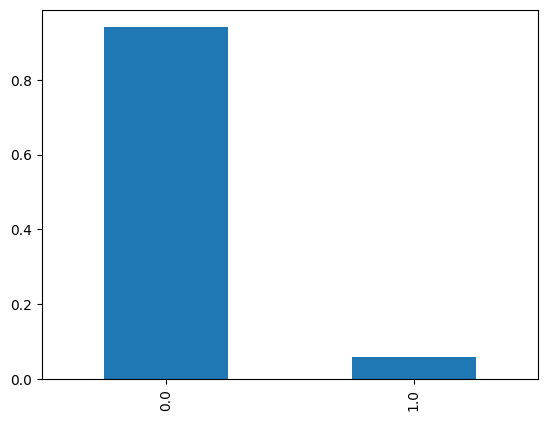

In [15]:
class_frequency.plot(kind='bar')
print("Matriz de confusión:", (confusion_matrix(target_valid, predicted_valid)))
print("Valor del Recall_Score es:", recall_score(target_valid, predicted_valid))
print("Valor de la precisión es:", precision_score(target_valid, predicted_valid))

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Equilibrando clases con sobremuestreo:</b> <a class="tocSkip"></a> 
</div>

In [25]:
repeat = 4800
def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat )
    
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat )

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=2684
    )
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4800
)

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Valor F1 del modelo de Regresión Logística con sobremuestreo:</b> <a class="tocSkip"></a>
    
</div>

In [27]:
model_up = LogisticRegression(random_state=2684, solver='liblinear')
model_up.fit(features_upsampled, target_upsampled)
predicted_valid_up = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

F1: 0.2808349146110057
(4800, 12)
(1200, 12)
(4800,)
(1200,)


<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Equilibrando clases con submuestreo:</b> <a class="tocSkip"></a> 
</div>

In [18]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.5
)

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Valor F1 del modelo de Regresión Logística con submuestreo:</b> <a class="tocSkip"></a>
    
</div>

In [19]:
model_down = LogisticRegression(random_state=2684, solver='liblinear')
model_down.fit(features_downsampled, target_downsampled)
predicted_valid_down = model_down.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.2808349146110057


<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Valor AUC-ROC del model de Regresíon Logística (con sobremuestreo):</b> <a class="tocSkip"></a>
    
</div>

F1 del conjunto de prueba: 0.35390946502057613
Valor del área bajo la curva ROC: 0.7550123312835177


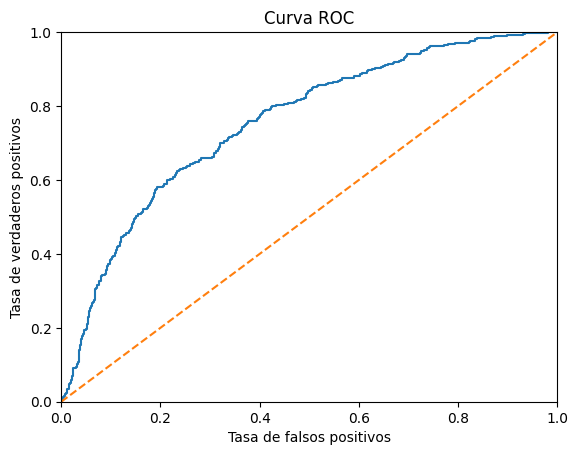

In [20]:
predictions_valid = model_up.predict(features_valid)

probabilities_valid = model_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("F1 del conjunto de prueba:", f1_score(target_test, predictions_valid))
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)
print("Valor del área bajo la curva ROC:", auc_roc)

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Entrenamiento de otros modelos:</b> <a class="tocSkip"></a>
    
</div>

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>DecisionTreeClassifier:</b> <a class="tocSkip"></a>
    
</div>

In [21]:
for depth in range(1, 21):
    model_2 = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=depth)
    model_2.fit(features_train, target_train)
    predictions_valid = model_2.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7965
max_depth = 2 : 0.8255
max_depth = 3 : 0.838
max_depth = 4 : 0.8425
max_depth = 5 : 0.85
max_depth = 6 : 0.849
max_depth = 7 : 0.8455
max_depth = 8 : 0.8425
max_depth = 9 : 0.84
max_depth = 10 : 0.8255
max_depth = 11 : 0.8225
max_depth = 12 : 0.822
max_depth = 13 : 0.8155
max_depth = 14 : 0.8075
max_depth = 15 : 0.803
max_depth = 16 : 0.8105
max_depth = 17 : 0.802
max_depth = 18 : 0.7985
max_depth = 19 : 0.7885
max_depth = 20 : 0.7925


In [22]:
model_2 = DecisionTreeClassifier(random_state=2684, criterion='gini', class_weight='balanced', max_depth=5)
model_2.fit(features_train, target_train)
predictions_valid = model_2.predict(features_valid)
predictions_test = model_2.predict(features_valid)
print("Exactitud del modelo modificado:", accuracy_score(target_valid, predictions_valid))
print("F1 del conjunto de prueba:", f1_score(target_valid, predictions_valid))

Exactitud del modelo modificado: 0.8
F1 del conjunto de prueba: 0.5901639344262295


<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Resultados del modelo DecisionTreeClassifier:</b> <a class="tocSkip"></a>
    la Exactitud del modelo del 80% muy similar al modelo de Regresión logística, sin embargo el valor F1 es de 0.59. 
</div>

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Random Forest Classifier:</b> <a class="tocSkip"></a>
    
</div>

In [23]:
best_score = 0
best_est = 0
for est in range(1, 101): 
    model_3 = RandomForestClassifier(random_state=2684, n_estimators=est) 
    model_3.fit(features_train, target_train) 
    score = model_3.score(features_valid, target_valid) 
    if score > best_score:
        best_score = score 
        best_est = est
print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))

La exactitud del mejor modelo en el conjunto de validación (n_estimators = 78): 0.861


In [24]:
model_3 = RandomForestClassifier(random_state=2684, n_estimators=78, class_weight='balanced') 
model_3.fit(features_train, target_train)
predictions_valid_3 = model_3.predict(features_valid)
print("F1 del conjunto de validación:", f1_score(target_valid, predictions_valid_3))


F1 del conjunto de validación: 0.5387096774193548


<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Resultados del modelo RandomForestClassifier:</b> <a class="tocSkip"></a>
    la Exactitud del modelo del 86% mayor a los modelos Regresión logística y DecisionTreeClassifier, en este caso el valor F1 tampoco es suficiente para alcanzar 0.59. 
</div>

<div class="alert alert-block alert-info" style="background-color: #AFEEEE; border-color: #4682B4; color: #4682B4;">
    <b>Conclusión:</b> <a class="tocSkip"></a>
    El modelo que tuvo un mayor exactitud fue RandomForestClassifier con 86%, sin embargo el modelo con mayor valor de F1 fue el DecisionTreeClassifier con 0.59 a pesar de que al Regresión Logpistica tuvo una valor  de AUC-ROC aceptable superior a 0.7
    
</div>